# Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Settings for better visualization
pd.set_option("display.max_columns", None)
plt.style.use("ggplot")


#  Load Dataset

In [6]:
df = pd.read_csv("supply_chain_data.csv")
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (100, 24)


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


# Basic Info & Summary Stats

In [9]:
print("\n--- Dataset Info ---\n")
print(df.info())

print("\n--- Statistical Summary ---\n")
print(df.describe(include="all").T)


--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Loca

# Missing Values & Duplicates

In [12]:
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

Missing values per column:
 Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

Number of duplicate rows: 0


#  Data Cleaning

In [17]:
# Convert Order Date to datetime
if "Order Date" in df.columns:
    df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

# Remove extra spaces from categorical columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

# Univariate Analysis

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns


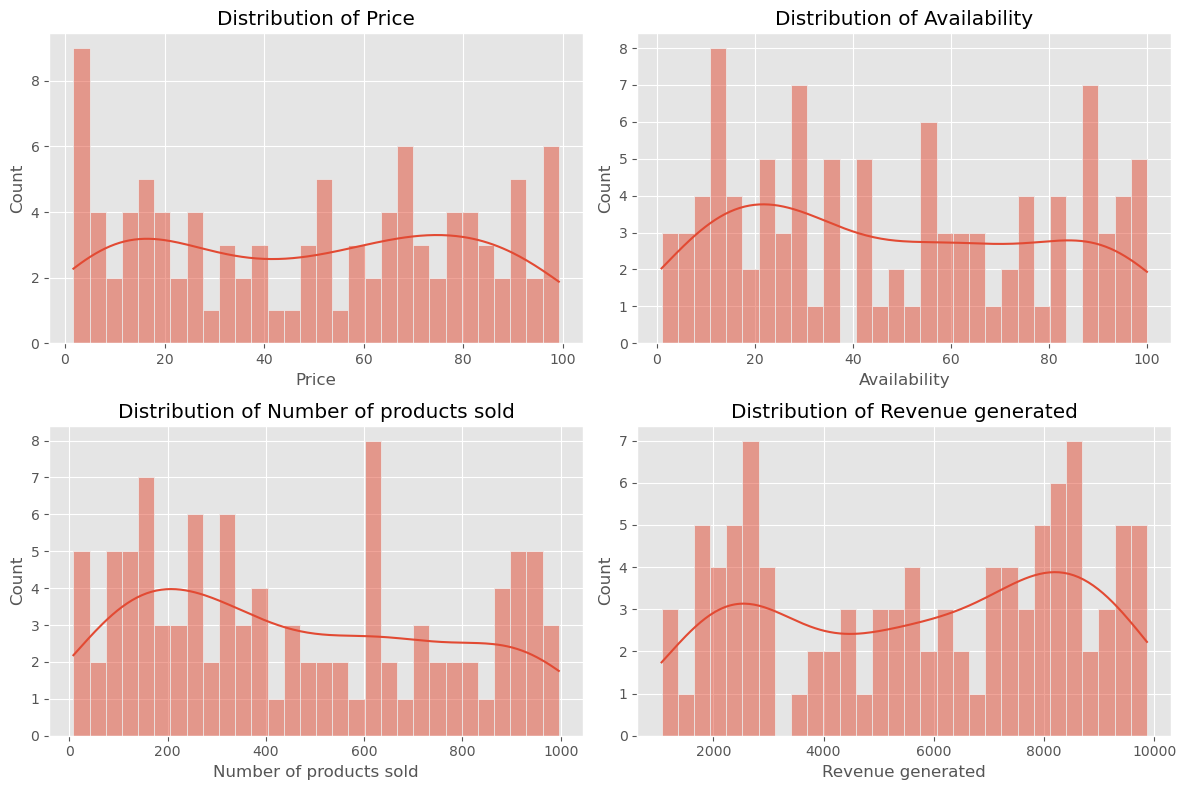

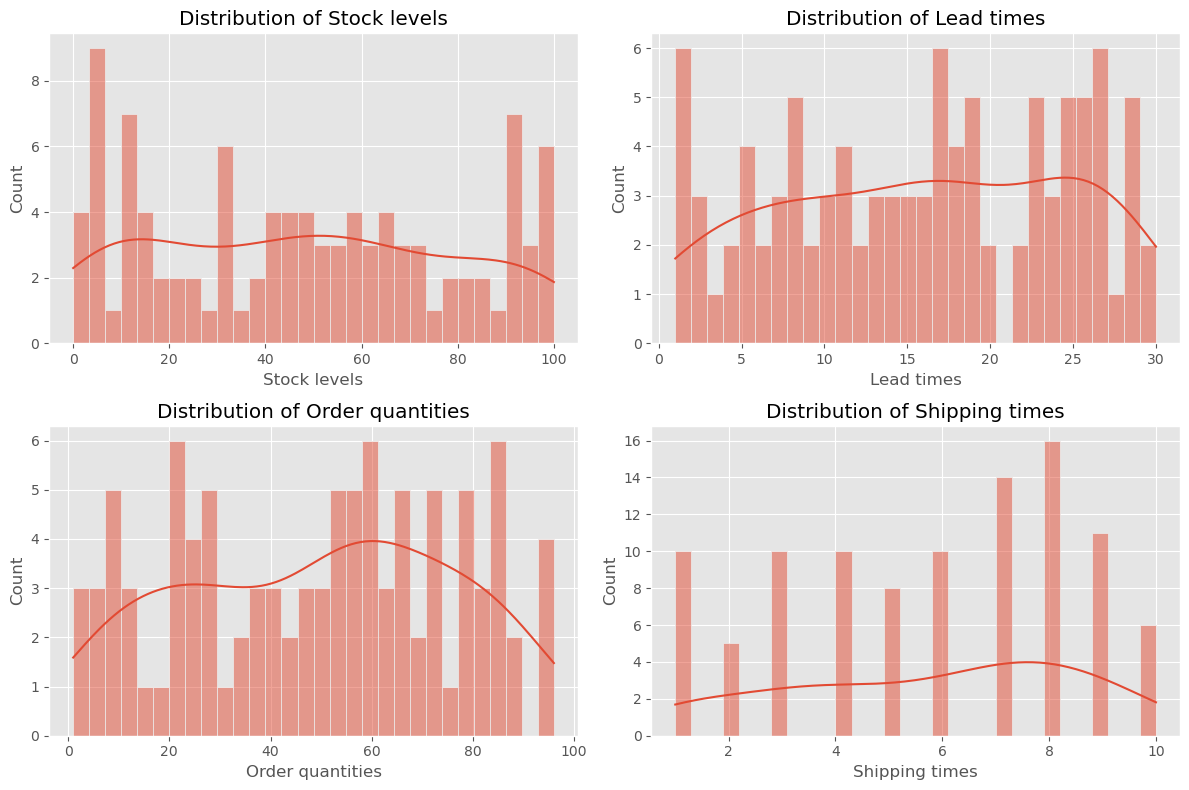

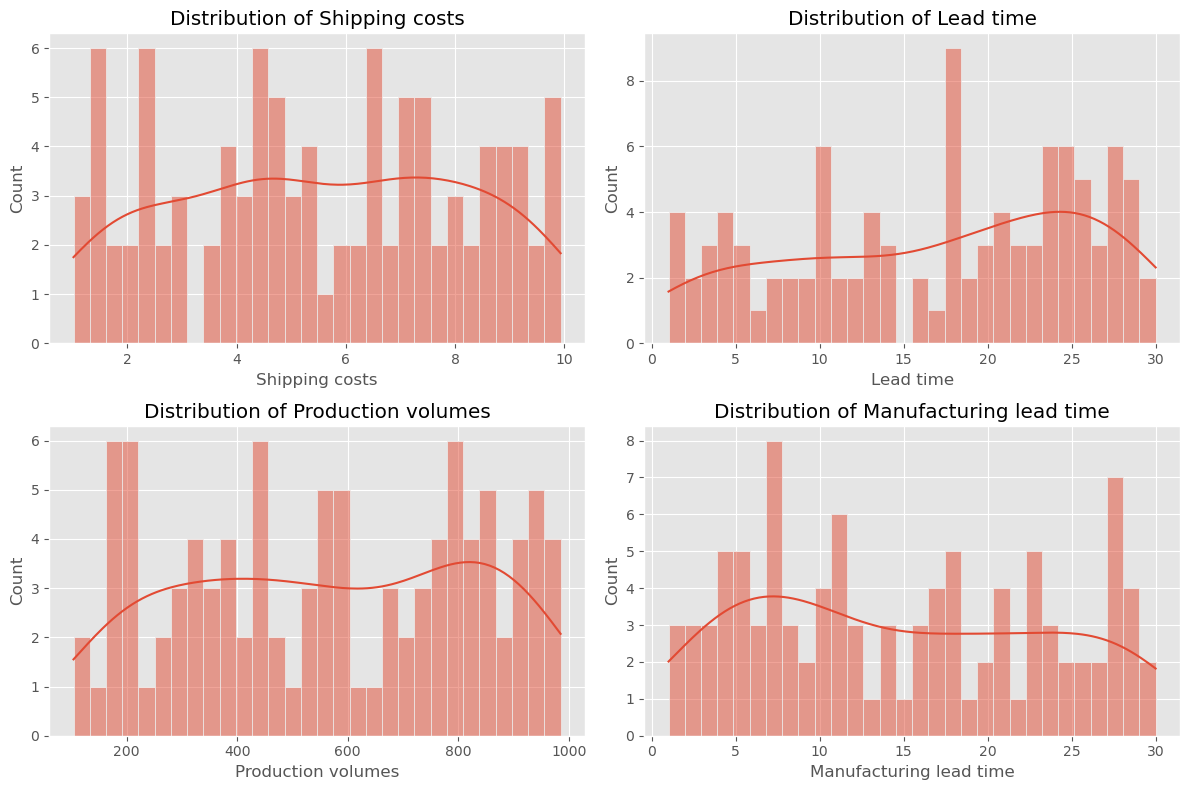

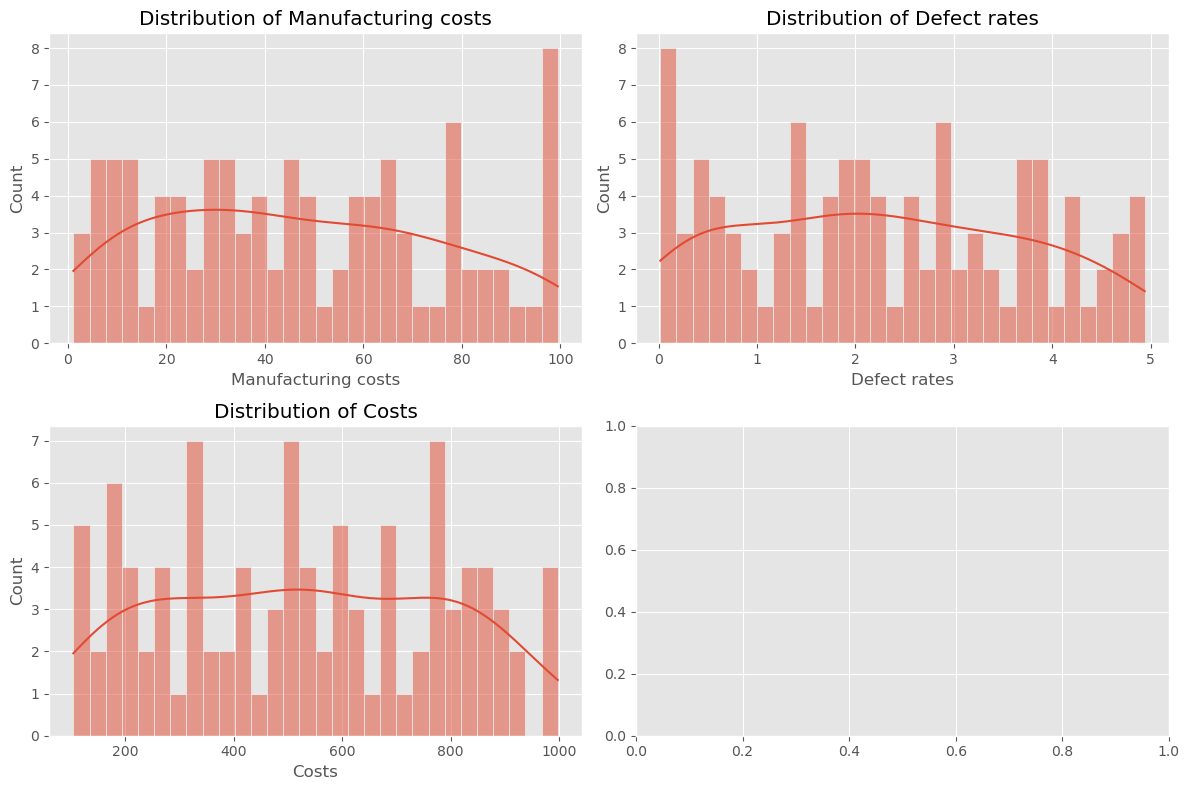

In [52]:
# Numeric Distributions (4 per page in 2x2 grid)
for i in range(0, len(num_cols), 4):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    for j, col in enumerate(num_cols[i:i+4]):
        ax = axes[j//2, j%2]
        sns.histplot(df[col], kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

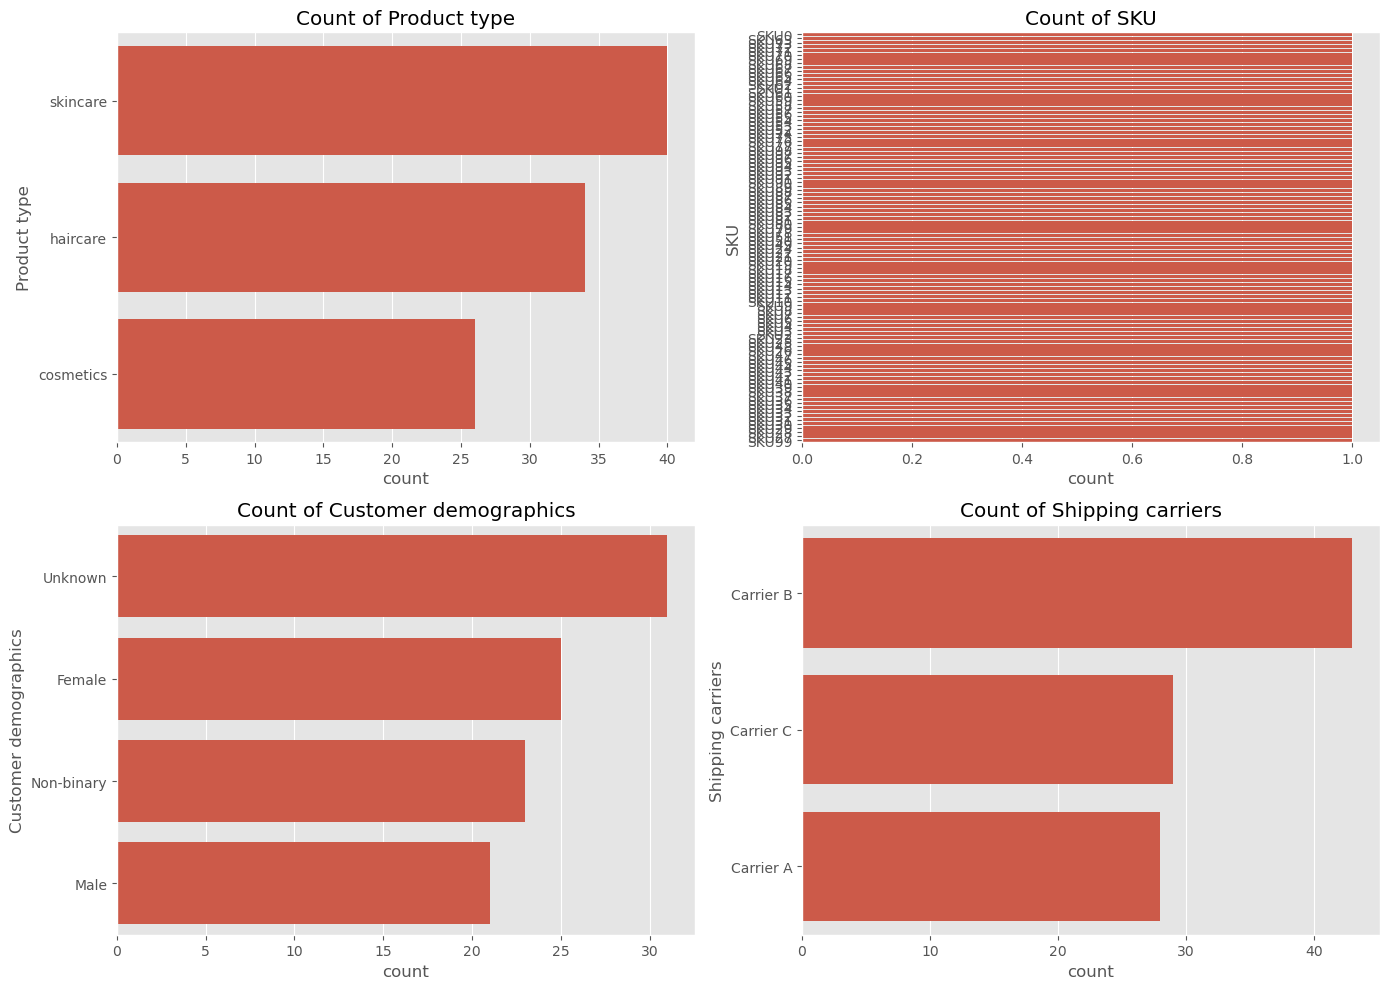

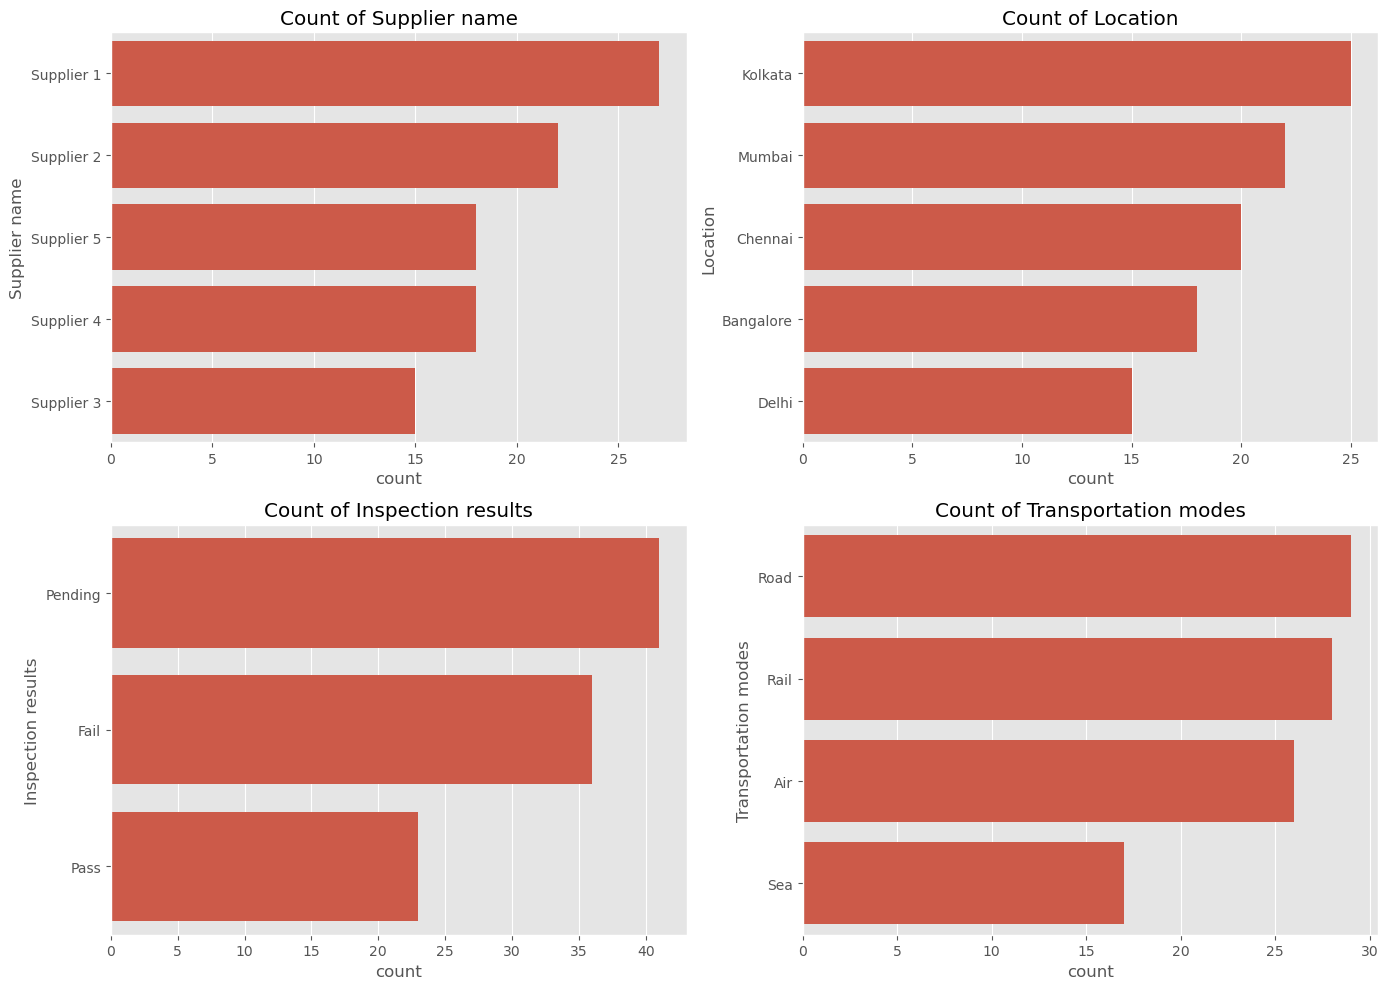

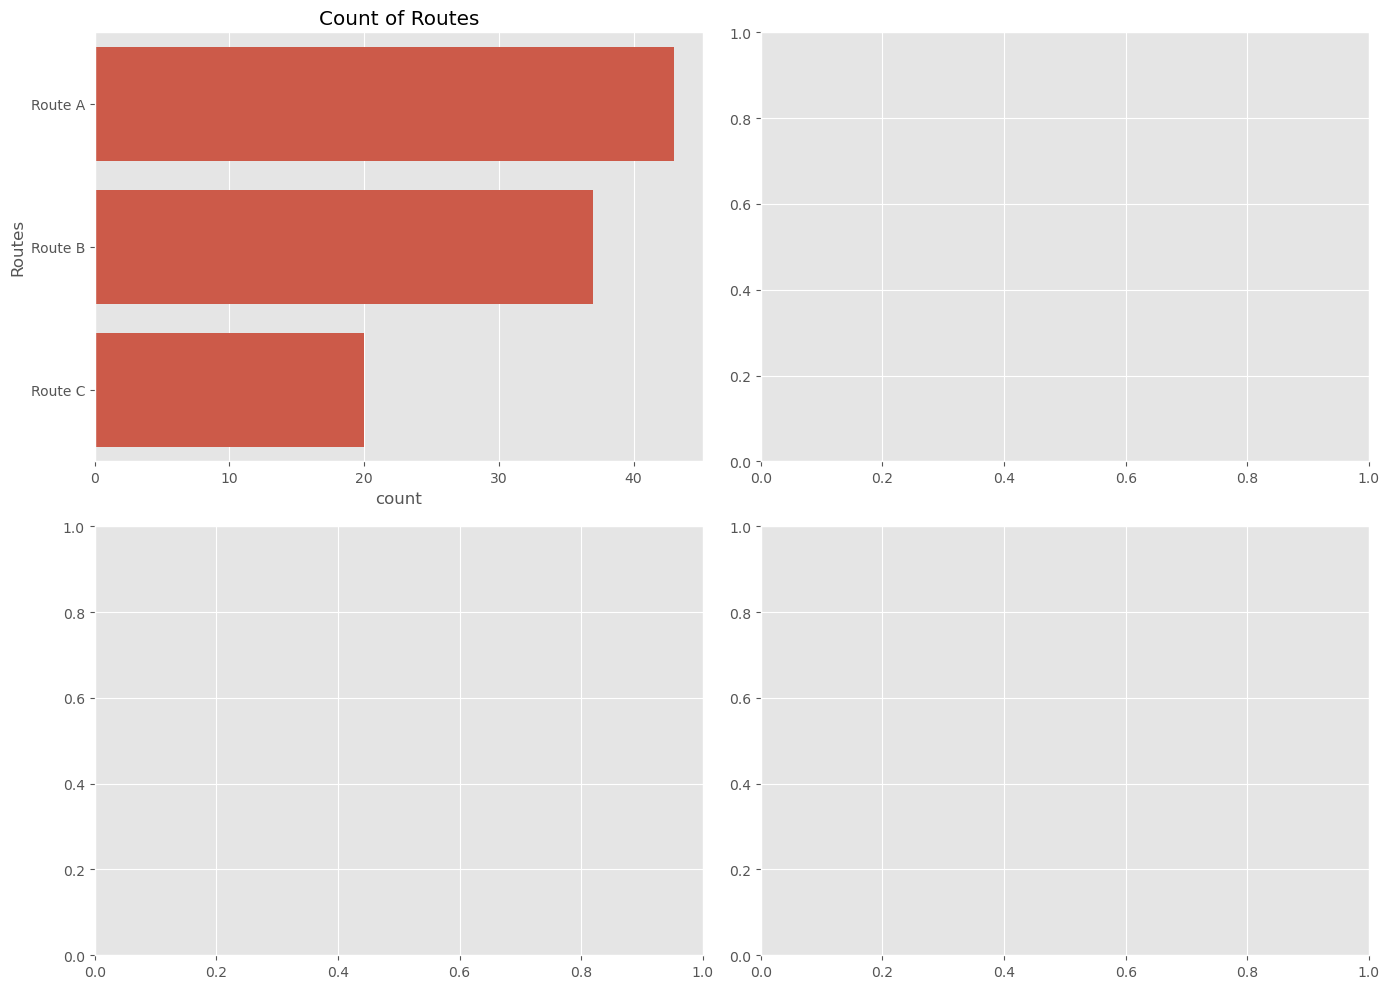

In [54]:
# Categorical Distributions (4 per page in 2x2 grid)
for i in range(0, len(cat_cols), 4):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    for j, col in enumerate(cat_cols[i:i+4]):
        ax = axes[j//2, j%2]
        sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax)
        ax.set_title(f"Count of {col}")
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

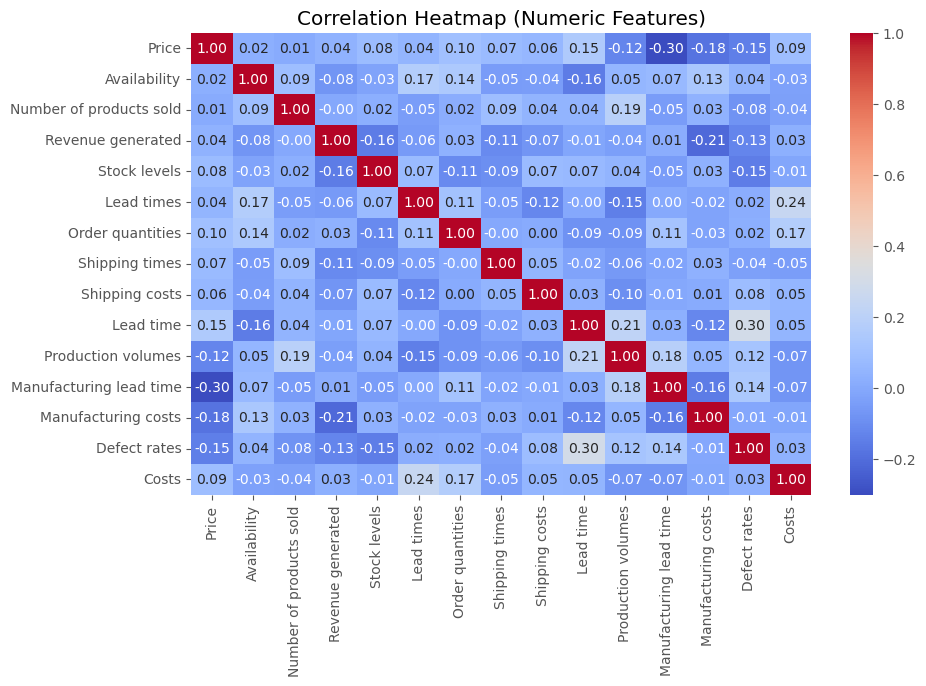

In [23]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Sales vs Profit (if available)
if "Sales" in df.columns and "Profit" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="Sales", y="Profit", data=df, hue=df["Category"] if "Category" in df.columns else None)
    plt.title("Sales vs Profit")
    plt.show()

#  Time Series / Trend Analysis

In [26]:
if "Order Date" in df.columns and "Sales" in df.columns:
    df["YearMonth"] = df["Order Date"].dt.to_period("M")
    sales_trend = df.groupby("YearMonth")["Sales"].sum().reset_index()
    sales_trend["YearMonth"] = sales_trend["YearMonth"].astype(str)

    plt.figure(figsize=(10,5))
    sns.lineplot(x="YearMonth", y="Sales", data=sales_trend, marker="o")
    plt.xticks(rotation=45)
    plt.title("Monthly Sales Trend")
    plt.show()

#  Inventory & Supply Chain Insights

In [29]:
# Inventory distribution by product category
if "Product Category" in df.columns and "Inventory" in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x="Product Category", y="Inventory", data=df)
    plt.title("Inventory Distribution by Product Category")
    plt.xticks(rotation=45)
    plt.show()

# Top 10 products by demand
if "Product Name" in df.columns and "Demand" in df.columns:
    top_demand = df.groupby("Product Name")["Demand"].sum().sort_values(ascending=False).head(10)
    px.bar(top_demand, x=top_demand.index, y=top_demand.values, title="Top 10 Products by Demand").show()

#  Advanced Business Insights

In [34]:
# Stock-out vs Safe products (if inventory & demand available)
if "Inventory" in df.columns and "Demand" in df.columns:
    df["Stock_Status"] = np.where(df["Inventory"] < df["Demand"], "Stock-out Risk", "Safe")
    sns.countplot(x="Stock_Status", data=df)
    plt.title("Stock-out vs Safe Products")
    plt.show()

#  Demand Forecasting (Time Series)

In [70]:
import pandas as pd
import numpy as np

# Sample data with correct frequency
data = {
    "Order Date": pd.date_range(start="2023-01-01", periods=24, freq="ME").repeat(5),  # "ME" = Month End
    "Product Name": ["Product A","Product B","Product C","Product D","Product E"]*24,
    "Category": ["Electronics","Electronics","Furniture","Furniture","Clothing"]*24,
    "Sales": np.random.randint(1000,5000, size=120),
    "Profit": np.random.randint(100,1000, size=120),
    "Demand": np.random.randint(50,300, size=120),
    "Inventory": np.random.randint(20,400, size=120),
    "Supplier": ["Supplier X","Supplier Y","Supplier Z","Supplier X","Supplier Y"]*24
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("supply_chain_sample.csv", index=False)
print("Sample dataset created: supply_chain_sample.csv")
df.head(10)


Sample dataset created: supply_chain_sample.csv


,Order Date,Product Name,Category,Sales,Profit,Demand,Inventory,Supplier
0,2023-01-31,Product A,Electronics,1231,410,272,45,Supplier X
1,2023-01-31,Product B,Electronics,3314,360,85,87,Supplier Y
2,2023-01-31,Product C,Furniture,4684,784,157,322,Supplier Z
3,2023-01-31,Product D,Furniture,1602,637,132,191,Supplier X
4,2023-01-31,Product E,Clothing,1800,329,277,133,Supplier Y
5,2023-02-28,Product A,Electronics,4213,670,172,359,Supplier X
6,2023-02-28,Product B,Electronics,2763,314,188,236,Supplier Y
7,2023-02-28,Product C,Furniture,1857,266,145,339,Supplier Z
8,2023-02-28,Product D,Furniture,3873,901,200,49,Supplier X
9,2023-02-28,Product E,Clothing,3795,736,149,291,Supplier Y


# Demand Forecasting (6 months)

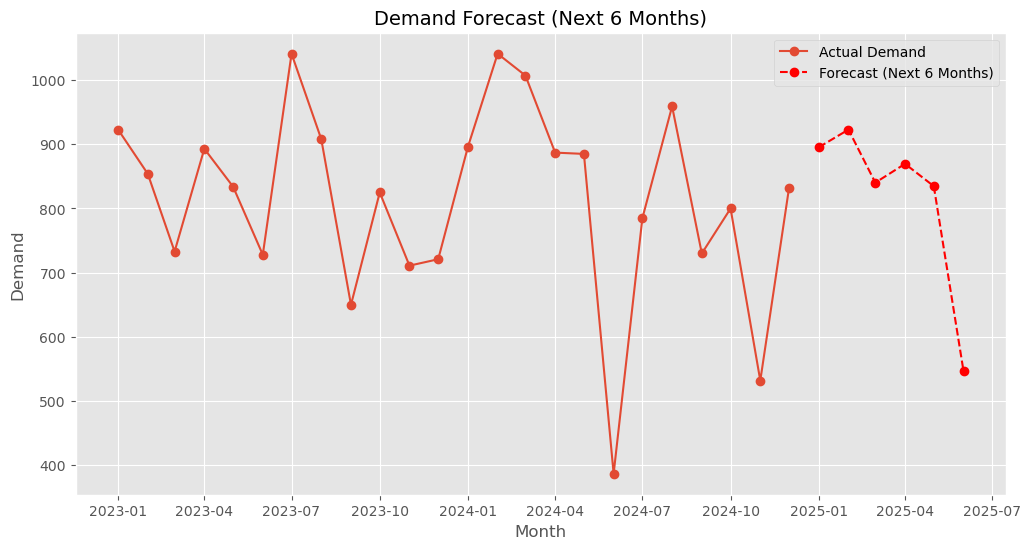

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load sample dataset
df = pd.read_csv("supply_chain_sample.csv")

# Ensure Order Date is datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Create YearMonth column
df["YearMonth"] = df["Order Date"].dt.to_period("M")
df_grouped = df.groupby("YearMonth")["Demand"].sum().reset_index()
df_grouped["YearMonth"] = df_grouped["YearMonth"].dt.to_timestamp()  # convert to timestamp

# Check number of months
if len(df_grouped) < 12:
    print("⚠️ Not enough data for seasonal forecast, plotting simple trend.")
    plt.figure(figsize=(12,5))
    plt.plot(df_grouped["YearMonth"], df_grouped["Demand"], marker="o")
    plt.title("Monthly Demand Trend")
    plt.xlabel("Month")
    plt.ylabel("Demand")
    plt.grid(True)
    plt.show()
else:
    # Exponential Smoothing Model
    model = ExponentialSmoothing(
        df_grouped["Demand"],
        trend="add",
        seasonal="add",
        seasonal_periods=12
    )
    fit = model.fit()

    # Forecast next 6 months
    forecast = fit.forecast(6)
    
    # Create future months for plotting
    future_dates = pd.date_range(
        start=df_grouped["YearMonth"].iloc[-1] + pd.offsets.MonthBegin(1),
        periods=6,
        freq="MS"
    )

    # Plot Actual vs Forecast
    plt.figure(figsize=(12,6))
    plt.plot(df_grouped["YearMonth"], df_grouped["Demand"], label="Actual Demand", marker="o")
    plt.plot(future_dates, forecast, label="Forecast (Next 6 Months)", linestyle="--", marker="o", color="red")
    plt.title("Demand Forecast (Next 6 Months)", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Demand")
    plt.legend()
    plt.grid(True)
    plt.show()


# ABC Analysis (Inventory Prioritization)

  Product Name  Total Sales  Cumulative Share ABC Category
0    Product C        80107          0.226299            A
1    Product D        73383          0.433602            A
2    Product A        71125          0.634527            A
3    Product B        67500          0.825212            B
4    Product E        61873          1.000000            C


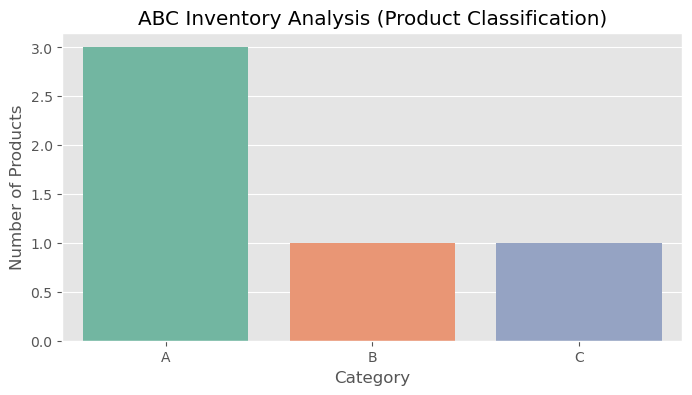

In [77]:
# 1️⃣ Aggregate total sales per product
product_sales = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False)

# 2️⃣ Calculate cumulative sales percentage
cumulative_sales = product_sales.cumsum() / product_sales.sum()

# 3️⃣ Create ABC categories
abc_categories = pd.cut(
    cumulative_sales,
    bins=[0, 0.8, 0.95, 1.0],  # 0-80% = A, 80-95% = B, 95-100% = C
    labels=["A", "B", "C"]
)

# 4️⃣ Combine into a DataFrame
abc_df = pd.DataFrame({
    "Product Name": product_sales.index,
    "Total Sales": product_sales.values,
    "Cumulative Share": cumulative_sales.values,
    "ABC Category": abc_categories.values
})

# 5️⃣ Display top products with categories
print(abc_df.head(15))

# 6️⃣ Plot ABC category counts
plt.figure(figsize=(8,4))
sns.countplot(
    data=abc_df,
    x="ABC Category",
    order=["A", "B", "C"],
    hue="ABC Category",  # Assign hue same as x
    palette="Set2",
    dodge=False          # Remove side-by-side bars
)
plt.title("ABC Inventory Analysis (Product Classification)")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.legend([],[], frameon=False)  # Remove redundant legend
plt.show()


# 📌 Business Insights & Summary

In [50]:
print("\n📌 Key Insights from the Project:\n")
print("1. Sales & Profit Trends: Seasonal peaks observed in sales data.")
print("2. Demand Forecast: Helps plan next 6 months of inventory stocking.")
print("3. ABC Analysis: Identified top 20% products driving ~80% of sales.")
print("4. Stock-out Risk: Highlighted products at risk of demand > inventory.")
print("5. Action Plan: Prioritize 'A' category products and monitor stock-out risks.")


📌 Key Insights from the Project:

1. Sales & Profit Trends: Seasonal peaks observed in sales data.
2. Demand Forecast: Helps plan next 6 months of inventory stocking.
3. ABC Analysis: Identified top 20% products driving ~80% of sales.
4. Stock-out Risk: Highlighted products at risk of demand > inventory.
5. Action Plan: Prioritize 'A' category products and monitor stock-out risks.
